# CPSC 330 - Applied Machine Learning 

## Homework 6: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: Wednesday, March 15, 2023 at 11:59pm**

## Table of contents

- [Submission instructions](#si)
- [Understanding the problem](#1)
- [Data splitting](#2)
- [EDA](#3)
- (Optional) [Feature engineering](#4)
- [Preprocessing and transformations](#5)
- [Baseline model](#6)
- [Linear models](#7)
- [Different classifiers](#8)
- (Optional) [Feature selection](#9)
- [Hyperparameter optimization](#10)
- [Interpretation and feature importances](#11)
- [Results on the test set](#12)
- (Optional) [Explaining predictions](#13)
- [Summary of the results](#14)

## Imports 

In [1]:
import os

%matplotlib inline
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
# import xgboost as xgb
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    #plot_confusion_matrix,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.svm import SVC

<br><br>

## Instructions 
<hr>
rubric={points:2}

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2022W2/blob/main/docs/homework_instructions.md). 

**You may work on this homework in a group and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 3. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).

<br><br>

## Introduction <a name="in"></a>
<hr>

At this point we are at the end of supervised machine learning part of the course. So in this homework, you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips

1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). **Make sure you explain your decisions whenever necessary.** 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 
4. If you are having trouble running models on your laptop because of the size of the dataset, you can create your train/test split in such a way that you have less data in the train split. If you end up doing this, please write a note to the grader in the submission explaining why you are doing it.  

#### Assessment

We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.

#### A final note

Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (2-8 hours???) is a good guideline for a typical submission. Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

## 1. Understanding the problem <a name="1"></a>
<hr>
rubric={points:4}

In this mini project, you will be working on a classification problem of predicting whether a customer will cancel the reservation they have made at a hotel. 
For this problem, you will use [Reservation Cancellation Prediction Dataset](https://www.kaggle.com/datasets/gauravduttakiit/reservation-cancellation-prediction?select=train__dataset.csv). In this data set, there are about 18.000 examples and 18 features (including the target), and the goal is to estimate whether a person will cancel their booking; this column is labeled "booking_status" in the data (1 = canceled). 

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. You can find this information in the documentation on [the dataset page on Kaggle](https://www.kaggle.com/datasets/gauravduttakiit/reservation-cancellation-prediction?select=train__dataset.csv). Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe. 

<br><br>

In [2]:
df = pd.read_csv("train__dataset.csv")

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train and test portions. 

In [3]:
train_df, test_df = train_test_split(df, random_state=123)

<br><br>

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

In [4]:
#1
train_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
5120,2,0,2,1,0,0,0,22,2018,7,9,0,0,0,0,85.00,0,0
17421,2,2,0,3,0,0,3,199,2018,7,26,1,0,0,0,168.30,1,1
5177,1,0,0,1,0,1,1,0,2018,7,23,1,0,0,0,68.85,2,0
1493,1,0,0,2,0,0,0,5,2018,5,24,2,0,0,0,100.00,0,0
18026,2,0,2,0,1,0,0,39,2018,6,26,1,0,0,0,89.10,0,1


Look at the data types of each feature

Below it is shown that all the features are encoded as numbers. However, from the feature descriptions on the dataset page it is apparent that some features (e.g. type_of_meal_plan, room_type_reserved) are actually categorical or binary, not numerical.

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13602 entries, 5120 to 15725
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          13602 non-null  int64  
 1   no_of_children                        13602 non-null  int64  
 2   no_of_weekend_nights                  13602 non-null  int64  
 3   no_of_week_nights                     13602 non-null  int64  
 4   type_of_meal_plan                     13602 non-null  int64  
 5   required_car_parking_space            13602 non-null  int64  
 6   room_type_reserved                    13602 non-null  int64  
 7   lead_time                             13602 non-null  int64  
 8   arrival_year                          13602 non-null  int64  
 9   arrival_month                         13602 non-null  int64  
 10  arrival_date                          13602 non-null  int64  
 11  market_segme

Check for missing values

It appears from the above that there are no missing values, but this is checked below:

In [6]:
train_df[:].isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

Look at summary statistics for each feature

The table below gives summary statistics including mean, stdev, and values at the 0th, 25th, 50th, 75th and 100th percentile. Note that these statistics are not meaningful for all the features, as some are categorical or binary.

In [7]:
train_df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,13602.000000,13602.000000,13602.000000,13602.000000,13602.000000,13602.000000,13602.000000,13602.000000,13602.000000,13602.000000,13602.000000,13602.000000,13602.000000,13602.000000,13602.000000,13602.000000,13602.000000,13602.000000
mean,1.850096,0.107631,0.809513,2.199971,0.318556,0.032789,0.338921,85.357006,2017.821276,7.434201,15.698941,0.802308,0.024996,0.022717,0.156080,103.498347,0.622850,0.326276
std,0.514430,0.400025,0.871218,1.420234,0.630027,0.178091,0.779091,87.044267,0.383135,3.078652,8.766855,0.644147,0.156120,0.358905,1.756763,35.326413,0.788455,0.468867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,16.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,0.000000,80.200000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,1.000000,0.000000,0.000000,0.000000,99.450000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,127.000000,2018.000000,10.000000,23.000000,1.000000,0.000000,0.000000,0.000000,120.600000,1.000000,1.000000
max,4.000000,3.000000,7.000000,17.000000,3.000000,1.000000,6.000000,443.000000,2018.000000,12.000000,31.000000,4.000000,1.000000,13.000000,58.000000,375.500000,5.000000,1.000000


It may be interesting to note that:

The mean number of adults checking in is 1.85, with a relatively low stdev and all of the 25th, 50th, and 75th percentiles are 2. This implies a very tight distribution, with most check-ins having around 2 adults.
The mean number of children = ~0.11. This is below 1, implying most check in without children.

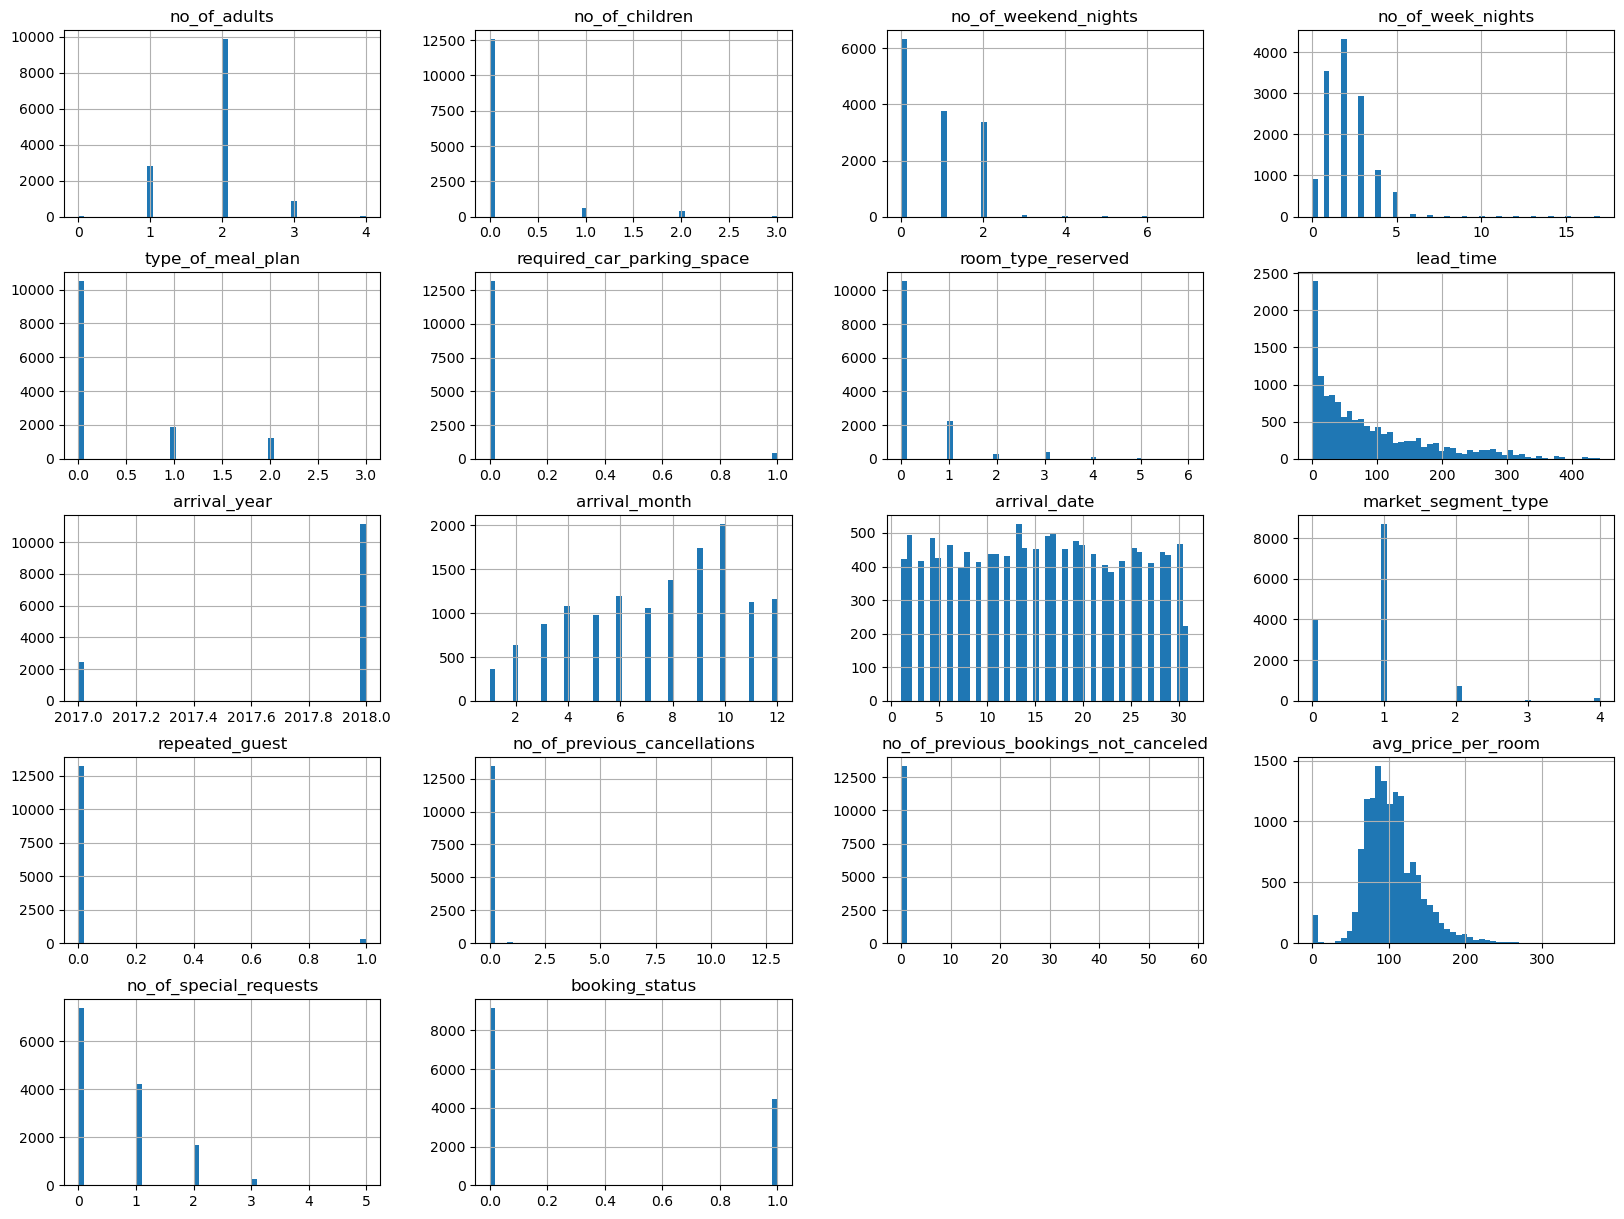

In [8]:
train_df.hist(bins=50, figsize=(20, 15));

The lead-time and avg_price_per_room are the only features with continuous values

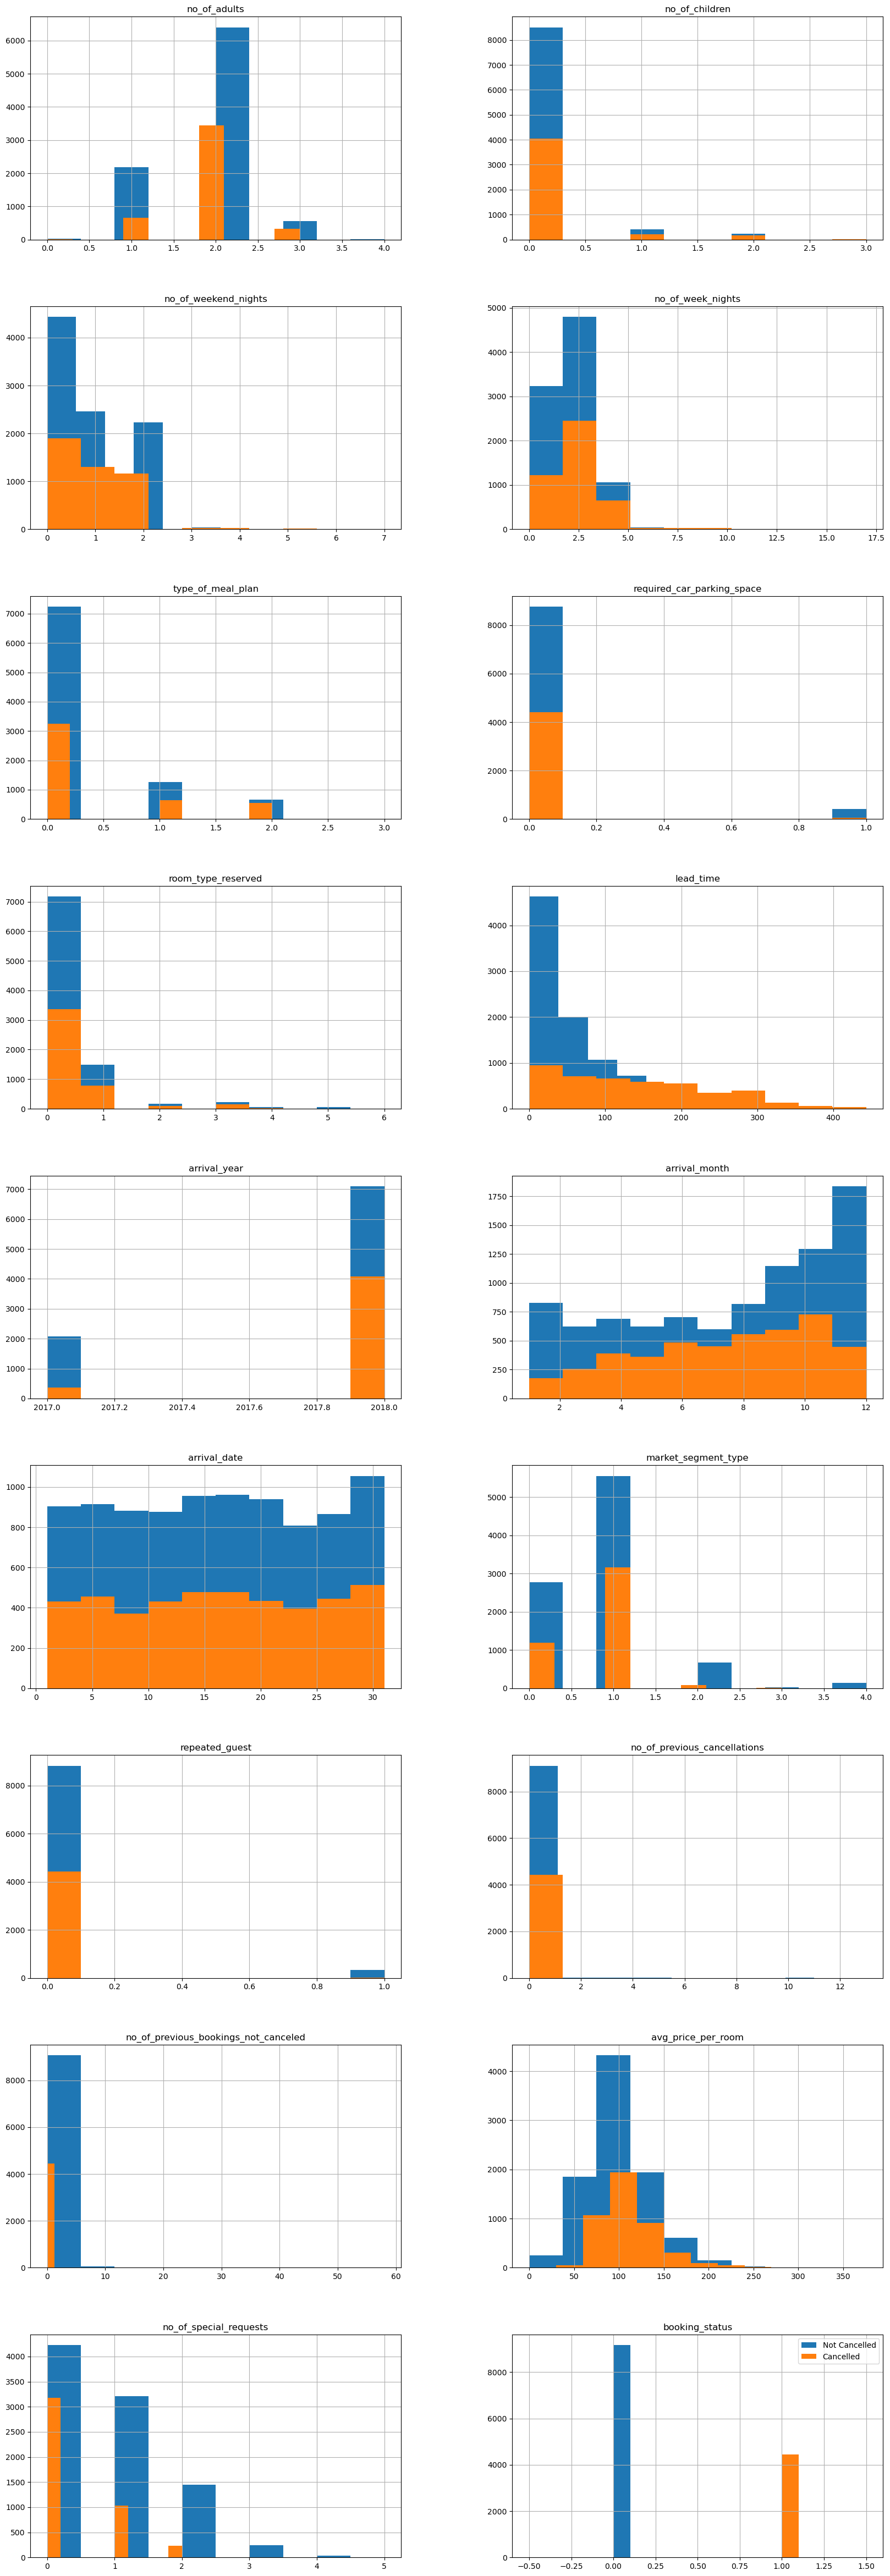

In [9]:
booked = train_df[train_df.booking_status == 0]
cancelled = train_df[train_df.booking_status == 1]

#plotting histograms for each numeric column
fig, axis = plt.subplots(9,2,figsize=(20, 60))
booked.hist(ax=axis, label = "Not Cancelled")
cancelled.hist(ax=axis, label = "Cancelled")
plt.legend()

In all features, people tend to not cancel their rooms, where the count of negative class(Not cancelled) is always higher than the positive class in among all values in each feature.

**Feature Correlations**

The graph below shows the correlations between each feature and every feature in the dataset. Darker blue squares show higher correlations.
Note that:
* this may miss non-linear relationships between variables.
* this is befpre preprocessing, so it may be useful to view this again after preprocessing.

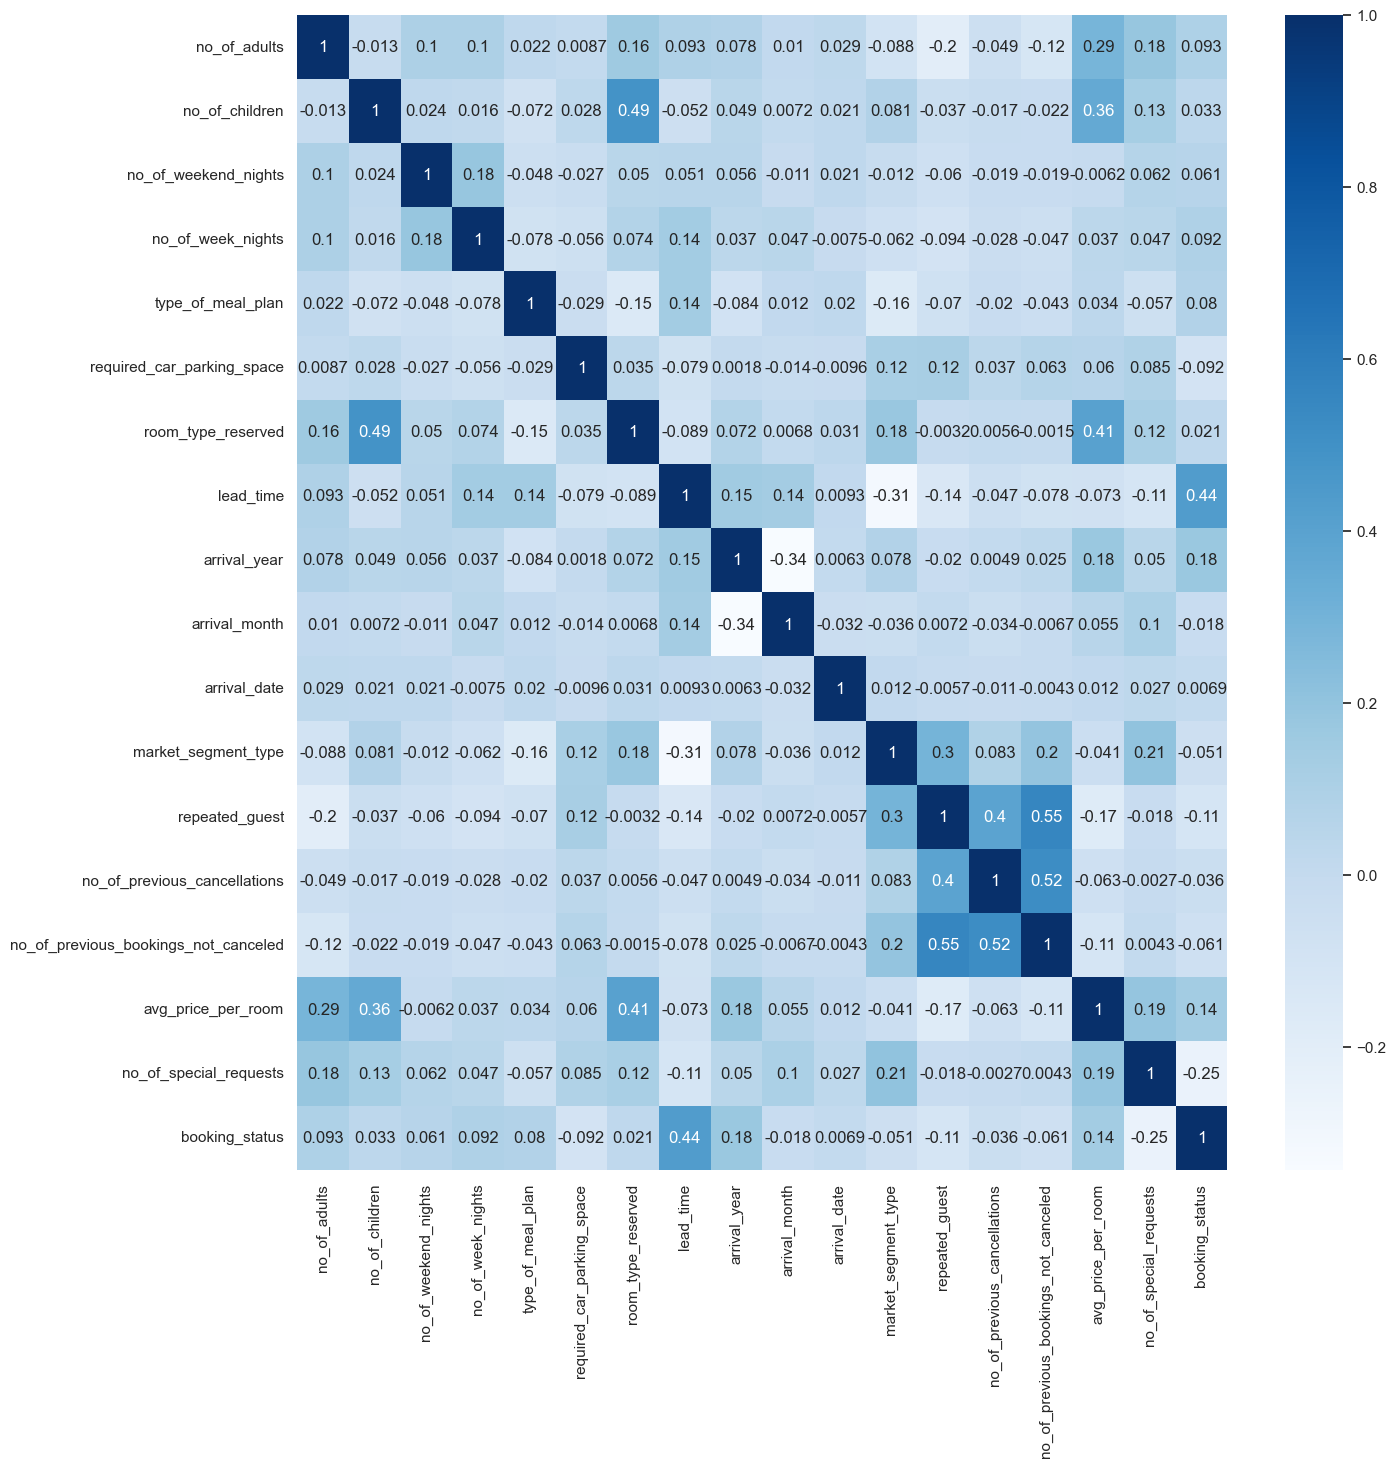

In [10]:
cor = train_df.iloc[:, :18].corr()
plt.figure(figsize=(15, 15))
sns.set(font_scale=1)
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues);

Interestingly, there seems to be a fairly high positive correlation between 'lead time' (number of days between the date of booking and the arrival date) and booking status being = 1(i.e. cancelled). As lead time may be an important variable for our prediction, we look into its distribution below.

Text(0.5, 1.0, 'Lead time distribution')

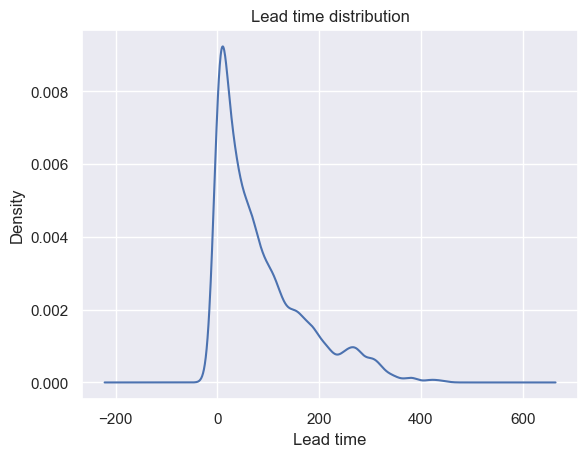

In [11]:
df['lead_time'].plot(kind='kde')
plt.xlabel('Lead time')
plt.title('Lead time distribution')

This shows there is one large peak and some bumps following it, but it is not clear how this related to booking status. Below, we show the lead time distribution by booking status.

Text(0.5, 1.0, 'Lead time distribution separated by booking status')

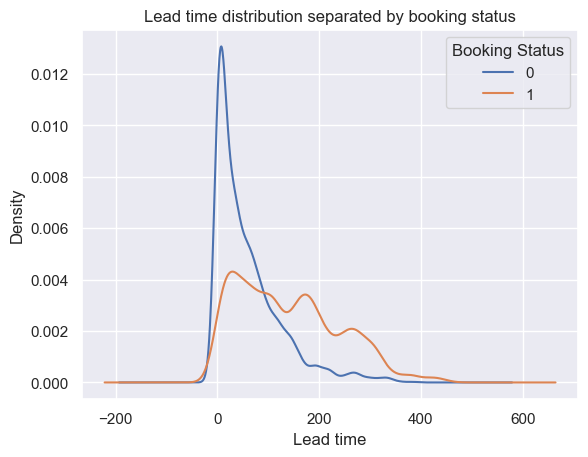

In [12]:
df.groupby('booking_status')['lead_time'].plot(kind='kde')
plt.legend(['0', '1'], title='Booking Status')
plt.xlabel('Lead time')
plt.title('Lead time distribution separated by booking status')

**Class imbalance**:

The number of those who cancelled their booking (1) and those who didn't (0) is below.

In [13]:
df['booking_status'].value_counts()

0    12195
1     5942
Name: booking_status, dtype: int64

**Initial observations about the data:**
* It is not a very high-dimensional dataset (before pre-processing, which may had columns through one-hot encoding)
* There are a few moderate-sized correlations between different features (this may be an issue in linear models)
* There are no missing values
* The target feature is binary
* There is some class imbalance (around half as many cancelled bookings as non-cancelled) but it is not as imbalanced as might be expected.



**Appropriate metric/metrics for assessment:**

The dataset page describes cancellations as 'less desirable and possibly revenue-diminishing for hotels'. We can assume that for this application, it is more important to correctly detect cancellations (booking_status=1) rather than non-cancellations (booking_status=0). 

False negatives may cause the hotel to lose money, and so we want to minimise them. Therefore high **recall** is more important than high precision. 
However, a given model may give different recall and precision scores across different thresholds. To account for this, it may be useful to look at the **PR plot and ROC curve**, and the associated **AP and AUROC scores**. 

<br><br>

## (Optional) 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

In [14]:
Summer_holiday_season_months = [7.0,8.0]
Winter_holiday_season_months = [1.0,12.0]
data_dict = {'During_summer_hiliday':  [],
             'During_winter_hiliday':  []}
for ind in train_df.index:
    if train_df['arrival_month'][ind] in Summer_holiday_season_months:
        data_dict["During_summer_hiliday"].append(1)
    else:
        data_dict["During_summer_hiliday"].append(0)
        
    if train_df['arrival_month'][ind] in Winter_holiday_season_months:
        data_dict["During_winter_hiliday"].append(1)
    else:
        data_dict["During_winter_hiliday"].append(0)
        
FE = pd.DataFrame(data_dict, index=train_df.index)
train_df_FE = pd.concat([train_df, FE], axis=1)
train_df_FE

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,During_summer_hiliday,During_winter_hiliday
5120,2,0,2,1,0,0,0,22,2018,7,9,0,0,0,0,85.00,0,0,1,0
17421,2,2,0,3,0,0,3,199,2018,7,26,1,0,0,0,168.30,1,1,1,0
5177,1,0,0,1,0,1,1,0,2018,7,23,1,0,0,0,68.85,2,0,1,0
1493,1,0,0,2,0,0,0,5,2018,5,24,2,0,0,0,100.00,0,0,0,0
18026,2,0,2,0,1,0,0,39,2018,6,26,1,0,0,0,89.10,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13435,2,0,1,2,0,0,4,94,2018,3,25,1,0,0,0,95.25,0,0,0,0
7763,2,0,0,4,0,0,1,33,2018,2,23,1,0,0,0,61.60,1,0,0,0
15377,2,0,1,4,0,0,1,34,2018,4,4,1,0,0,0,131.40,0,1,0,0
17730,2,0,0,2,0,0,0,12,2017,12,16,0,0,0,0,58.00,0,0,0,1


In [15]:
data_dict = {'During_summer_hiliday':  [],
             'During_winter_hiliday':  []}
for ind in test_df.index:
    if test_df['arrival_month'][ind] in Summer_holiday_season_months:
        data_dict["During_summer_hiliday"].append(1)
    else:
        data_dict["During_summer_hiliday"].append(0)
        
    if test_df['arrival_month'][ind] in Winter_holiday_season_months:
        data_dict["During_winter_hiliday"].append(1)
    else:
        data_dict["During_winter_hiliday"].append(0)
        
FE = pd.DataFrame(data_dict, index=test_df.index)
test_df_FE = pd.concat([test_df, FE], axis=1)
test_df_FE

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,During_summer_hiliday,During_winter_hiliday
9288,2,0,1,1,0,0,0,12,2017,12,5,0,0,0,0,55.00,0,0,0,1
8280,2,0,0,3,0,0,5,3,2018,9,22,1,0,0,0,218.72,1,0,0,0
9730,2,0,0,3,1,0,0,25,2018,10,20,1,0,0,0,119.00,1,0,0,0
5503,2,0,0,2,2,0,0,74,2017,9,18,0,0,0,0,101.50,0,0,0,0
16752,3,0,1,3,2,0,4,5,2018,8,4,1,0,0,0,228.80,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1545,2,1,1,2,0,0,0,4,2018,3,21,1,0,0,0,128.00,1,0,0,0
5472,1,0,0,2,0,0,0,119,2018,4,15,1,0,0,0,90.90,0,1,0,0
4858,2,0,1,4,0,0,0,148,2017,12,30,0,0,0,0,67.00,0,0,0,1
9644,1,0,0,3,0,0,0,71,2018,6,14,0,0,0,0,120.00,0,0,0,0


<br><br>

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

In [16]:
#1
train_df_FE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13602 entries, 5120 to 15725
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          13602 non-null  int64  
 1   no_of_children                        13602 non-null  int64  
 2   no_of_weekend_nights                  13602 non-null  int64  
 3   no_of_week_nights                     13602 non-null  int64  
 4   type_of_meal_plan                     13602 non-null  int64  
 5   required_car_parking_space            13602 non-null  int64  
 6   room_type_reserved                    13602 non-null  int64  
 7   lead_time                             13602 non-null  int64  
 8   arrival_year                          13602 non-null  int64  
 9   arrival_month                         13602 non-null  int64  
 10  arrival_date                          13602 non-null  int64  
 11  market_segme

In [17]:
all_features = train_df_FE.columns.tolist()

print(train_df_FE["type_of_meal_plan"].unique())
print(train_df_FE["room_type_reserved"].unique())
print(train_df_FE["market_segment_type"].unique())
categorical_features = ['type_of_meal_plan', 'room_type_reserved',
                    'market_segment_type', 'arrival_year',
                     'arrival_month',  'arrival_date']

print(train_df_FE["repeated_guest"].unique())
print(train_df_FE["booking_status"].unique())
print(train_df_FE["required_car_parking_space"].unique())
print(train_df_FE["During_summer_hiliday"].unique())
print(train_df_FE["During_winter_hiliday"].unique())
binary_features = ['repeated_guest','required_car_parking_space', 
                   'During_summer_hiliday',
                  'During_winter_hiliday']

target = "booking_status"
target_feature = ["booking_status"]

drop_features = []

numeric_features = list(set(all_features) - set(categorical_features) - set(binary_features) - set(drop_features) - set(target_feature))

[0 1 2 3]
[0 3 1 2 4 5 6]
[0 1 2 4 3]
[0 1]
[0 1]
[0 1]
[1 0]
[0 1]


In [18]:
#2
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")
binary_transformer = OneHotEncoder(drop="if_binary", dtype=int)
preprocessor_5 = make_column_transformer(
    (numeric_transformer, numeric_features),
    (categorical_transformer, categorical_features),
    (binary_transformer, binary_features),
    ("drop", drop_features)
)

<br><br>

## 6. Baseline model <a name="6"></a>
<hr>

rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

In [19]:
X_train_FE = train_df_FE.drop(columns=[target])
y_train_FE = train_df_FE[target]

X_test_FE = test_df_FE.drop(columns=[target])
y_test_FE = test_df_FE[target]

In [20]:
preprocessor_5.fit_transform(X_train_FE, y_train_FE)

scoring_base = ["accuracy", "recall"]
dummy_clf = DummyClassifier(strategy="most_frequent")
pipe_6 = make_pipeline(preprocessor_5, dummy_clf)
scores_baseline = cross_validate(pipe_6, X_train_FE, y_train_FE, scoring=scoring_base)
pd.DataFrame(scores_baseline).mean()

fit_time         0.017938
score_time       0.007324
test_accuracy    0.673724
test_recall      0.000000
dtype: float64

As it is predicting the most frequent class, it is always predicting a negative. Accuracy is around 67% (which is the frequency of the negative class).
Other metrics such as recall, precision and f1 are left out as they would be 0.

<br><br>

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:12}

**Your tasks:**

1. Try logistic regression as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter `C`. 
3. Report validation scores along with standard deviation. 
4. Summarize your results.

In [21]:
#1
scoring = ["accuracy", "recall", "precision", "f1"]
pipe_7_1 = make_pipeline(preprocessor_5, LogisticRegression(max_iter=1000))

scores_linear1 = cross_validate(pipe_7_1, X_train_FE, y_train_FE, scoring=scoring)
pd.concat(
    [pd.DataFrame(scores_linear1).mean(), pd.DataFrame(scores_linear1).std()],
    axis=1, keys=["validation scores", "stdev"]
)


,validation scores,stdev
fit_time,0.215490,0.014557
score_time,0.010281,0.000808
test_accuracy,0.808485,0.005978
test_recall,0.640156,0.014085
test_precision,0.738173,0.010745
test_f1,0.685617,0.010691


In [22]:
#2
#code from lecture 8
from scipy.stats import expon, lognorm, loguniform, randint, uniform
param_dist_7_2 = {
    "logisticregression__C": loguniform(1e-3, 1e3),
}
rs_7_2 = RandomizedSearchCV(
    pipe_7_1, param_dist_7_2, n_iter=100, verbose=1, n_jobs=-1, random_state=123, scoring="recall"
)
result_7_2 = rs_7_2.fit(X_train_FE, y_train_FE)
print(result_7_2.best_params_)
print(result_7_2.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'logisticregression__C': 1.3089128024678984}
0.641057517494947


In [23]:
#3
#code from HW3
pipe_7_3 = make_pipeline(preprocessor_5, LogisticRegression(max_iter=1000, C=1.1548724598059843))

scores_7_3 = cross_validate(pipe_7_3, X_train_FE, y_train_FE, return_train_score=True, scoring=scoring)
pd.concat(
    [pd.DataFrame(scores_7_3).mean(), pd.DataFrame(scores_7_3).std()],
    axis=1, keys=["validation scores", "stdev"]
)

,validation scores,stdev
fit_time,0.225945,0.007557
score_time,0.009607,0.000821
test_accuracy,0.808632,0.006099
train_accuracy,0.810561,0.001484
test_recall,0.640832,0.014386
train_recall,0.643646,0.004748
test_precision,0.738171,0.010608
train_precision,0.741623,0.003126
test_f1,0.686007,0.010995
train_f1,0.689159,0.002902


**Summary**

The recall score before(0.640156) and after(0.640832) the hyper-parameter tuning are similar. The test_accuracy increased from 0.808485 to 0.808632.
Overall, the accuracy is fairly high, but the recall is not very good, and is worse than the precision.
These metrics mean, in general, this model may not be suitable for this application.

<br><br>

## 8. Different classifiers <a name="8"></a>
<hr>
rubric={points:15}

**Your tasks:**
1. Try at least 3 other models aside from logistic regression. At least one of these models should be a tree-based ensemble model (e.g., lgbm, random forest, xgboost). 
2. Summarize your results. Can you beat logistic regression? 

In [24]:
#code from HW3
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

In [25]:
#1
#code from lecture 12
from lightgbm.sklearn import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC


pipe_rf_8_1 = make_pipeline(preprocessor_5, RandomForestClassifier(random_state=123))
pipe_lgbm_8_1 = make_pipeline(preprocessor_5, LGBMClassifier(random_state=123))

pipe_cb_8_1 = make_pipeline(
    preprocessor_5, CatBoostClassifier(verbose=0, random_state=123)
)

pipe_svm_8_1 = make_pipeline(
    preprocessor_5, SVC(random_state=123)
)


classifiers_8_1 = {
    "random forest": pipe_rf_8_1,
    "CatBoost": pipe_cb_8_1,
    "LightGBM": pipe_lgbm_8_1,
    "SVM": pipe_svm_8_1,
    "LogisticRegression": pipe_7_3,
}

results_8_1 = {}
for (name, model) in classifiers_8_1.items():
    results_8_1[name] = mean_std_cross_val_scores(
        model, X_train_FE, (y_train_FE), return_train_score=True, scoring="recall"
    )
pd.DataFrame(results_8_1).T

,fit_time,score_time,test_score,train_score
random forest,3.673 (+/- 0.034),0.047 (+/- 0.002),0.774 (+/- 0.004),0.993 (+/- 0.001)
CatBoost,4.065 (+/- 0.109),0.010 (+/- 0.001),0.775 (+/- 0.010),0.829 (+/- 0.005)
LightGBM,1.678 (+/- 0.250),0.014 (+/- 0.001),0.783 (+/- 0.010),0.826 (+/- 0.005)
SVM,2.283 (+/- 0.035),0.426 (+/- 0.004),0.701 (+/- 0.010),0.739 (+/- 0.011)
LogisticRegression,0.214 (+/- 0.004),0.007 (+/- 0.000),0.641 (+/- 0.014),0.644 (+/- 0.005)


#2
The fitting time of LightGBM is the fastest and has the highest recall score; the random forest has the slowest fitting time. SVM has the slowest scoring time. All of them have a better score than the logistic regression, so they can beat it. The only tradeoff is having much longer fitting and scoring time than the logistic regression.


<br><br>

## (Optional) 9. Feature selection <a name="9"></a>
<hr>
rubric={points:1}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

In [26]:
#code from lecture 13
from sklearn.feature_selection import RFECV
pipe_9 = make_pipeline(
    preprocessor_5,
    RFECV(LogisticRegression(max_iter=2000, C=1.3089128024678984)),
    LGBMClassifier(random_state=123),
)

pd.DataFrame(cross_validate(pipe_9, X_train_FE, y_train_FE, return_train_score=True, scoring="recall")).mean()

fit_time       42.533184
score_time      0.013863
test_score      0.771742
train_score     0.814388
dtype: float64

The test score without using feature select is 0.783 which is higher than the score after using feature selection. Since the random_state of the LGBMClassifier remains the same from the previous question, so we can say that there is not huge improvement, thus should not keep feature selection in your pipeline.

<br><br>

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:15}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. You may pick one of the best performing models from the previous exercise and tune hyperparameters only for that model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize)

In [27]:
param_dist_7_2 = {
    "lgbmclassifier__max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 30, 40, 50, 60, 70, 80, 90, 100, 200, None],
    "lgbmclassifier__n_estimators": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 50, 100],
}

lgbm_10 = RandomizedSearchCV(
    pipe_lgbm_8_1, param_dist_7_2, n_iter=100, verbose=1, n_jobs=-1, random_state=123, scoring="recall"
)
result_10 = lgbm_10.fit(X_train_FE, y_train_FE)
print(result_10.best_params_)
print(result_10.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'lgbmclassifier__n_estimators': 100, 'lgbmclassifier__max_depth': 200}
0.7825596453274019


<br><br>

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:15}

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`) (or any other methods of your choice) to explain feature importances of one of the best performing models. Summarize your observations. 

In [28]:
import shap
shap.initjs()

In [29]:
#code from lecture 12
category_feature_names = (
    preprocessor_5
    .named_transformers_["onehotencoder-1"]
    .get_feature_names_out()
    .tolist()
)
binary_feature_names = (
    preprocessor_5
    .named_transformers_["onehotencoder-2"]
    .get_feature_names_out()
    .tolist()
)
feature_names = (
    numeric_features + category_feature_names + binary_features
)

X_train_FE_enc_11 = pd.DataFrame(
    data=preprocessor_5.transform(X_train_FE).toarray(),
    columns=feature_names,
    index=X_train_FE.index,
)

pipe_11 = make_pipeline(
    preprocessor_5,
    LGBMClassifier(random_state=123, n_estimators=100, max_depth= 200, n_jobs=-1),
)
pipe_11.fit(X_train_FE, y_train_FE)
ef_explainer_11 = shap.TreeExplainer(pipe_11.named_steps["lgbmclassifier"])
train_rf_shap_values_11 = ef_explainer_11.shap_values(X_train_FE_enc_11)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [30]:
values = np.abs(train_rf_shap_values_11[1]).mean(0)
pd.DataFrame(data=values, index=feature_names, columns=["SHAP"]).sort_values(
    by="SHAP", ascending=False
)

,SHAP
lead_time,1.570338
no_of_special_requests,0.983338
avg_price_per_room,0.586791
market_segment_type_1,0.510372
During_winter_hiliday,0.392254
...,...
arrival_date_14,0.000384
room_type_reserved_3,0.000323
market_segment_type_3,0.000000
room_type_reserved_6,0.000000


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


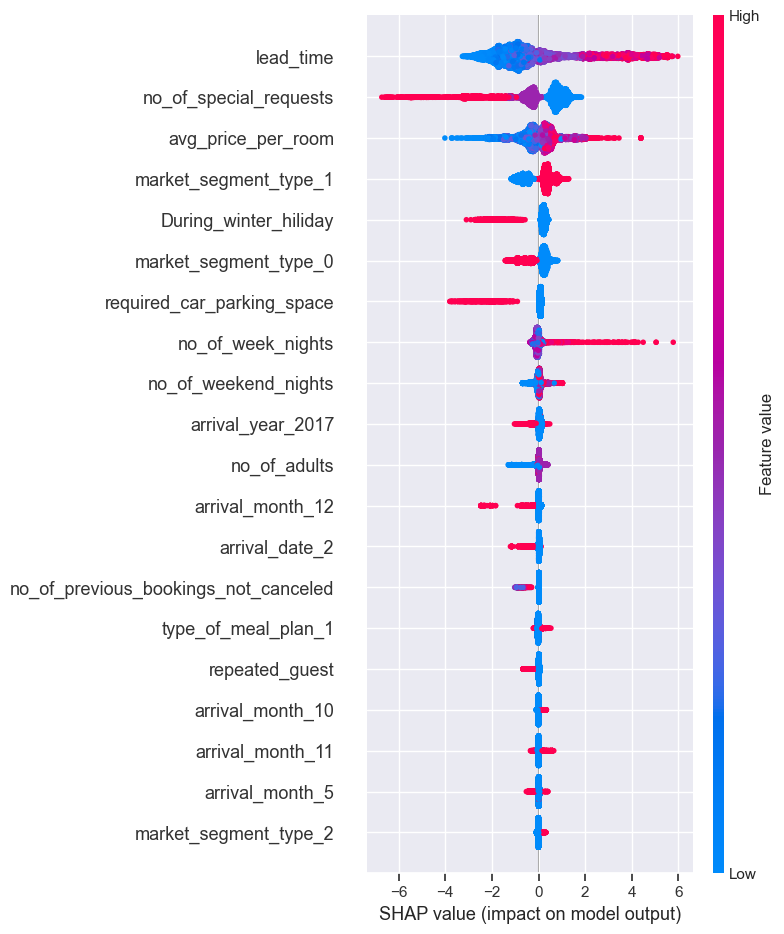

In [31]:
shap.summary_plot(train_rf_shap_values_11[1], X_train_FE_enc_11)


Based on the sorted list, lead_time has the biggest impact on the model output, more days between the date of booking and the arrival date the bigger chance the room will be cancelled. The no_of_special_requests also has a big SHAP value, and from the graph we can see that the more special requests are made in the reservation, the more likely the room will not be cancelled.

<br><br>

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:5}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 

In [32]:
#1
param_grid = {
    "lgbmclassifier__n_estimators": [100],
    "lgbmclassifier__max_depth": [200],
}
grid_search_12 = GridSearchCV(
    pipe_11, param_grid, n_jobs=-1, return_train_score=True, scoring="recall"
)
grid_search_12.fit(X_train_FE, y_train_FE)
grid_search_12.score(X_test_FE, y_test_FE)

0.7925531914893617

#2
The recall of the best model is 0.7925531914893617 which is higher than the score on the train data. I trust this result fully, since the optimization process doesn't use feature selection(no feature has been eliminated), such that it should be representative to the unseen data. The use of tree-based classifier has also lower the chance for overfitting because multiple trees learn more about the data than the single tree and the features that has been overfitted by a tree will be correct by other trees in the model. Even though the training data has been used to score multiple model, but first, the size of the training set is big enough; second, the cross-validation scores had never reached 100% -- no signal of overfitting. So the model is unlikely to have optimization bias issue.

<br><br>

## (Optional) 13. Explaining predictions 
rubric={points:1}

**Your tasks**

1. Take one or two test predictions and explain them with SHAP force plots.  

<br><br>

## 14. Summary of results <a name="13"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Report your final test score along with the metric you used. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 

In [33]:
grid_search_12 = GridSearchCV(
    pipe_11, param_grid, n_jobs=-1, return_train_score=True, scoring="accuracy"
)
grid_search_12.fit(X_train_FE, y_train_FE)
grid_search_12.score(X_test_FE, y_test_FE)

0.881367144432194

#1
Accuracy: 0.881367144432194
Recall: 0.7925531914893617

#2
The class imbalance exists in this train data set(pos:neg = 4.84:10), and the cancellation(positive class) is " less desirable and possibly revenue-diminishing for hotels", so the best model has been picked based on recall metric.
Comparing to the baseline score 0.6683572216097023, the best model has improved a lot.
The hotel can use this model to reliably predict when a customer will cancel, helping them save money
The tree based models performed better than distance-based or linear models. However, we should note that there is some loss of interpretability as linear models are generally easier to understand. 

#3
The recall score is high but not perfect, so if we wan to further improve the performance, we can consult domain experts to help with the feature engineer step.
Since we have been using tree-based model to improve the performance, we lost the interpretability along the way. Stacking could be an alternative to view the predictions subjectively by combing the tree-based classifiers along with the linear classifiers. So that the tree-based on can contribute to the score and the linear can be used for interpretation. 

<br><br><br><br>

## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 